
🔹 First Few Rows of the Dataset:

   RelativeCompactness  SurfaceArea  WallArea  RoofArea  OverallHeight  \
0                 0.98        514.5     294.0    110.25            7.0   
1                 0.98        514.5     294.0    110.25            7.0   
2                 0.98        514.5     294.0    110.25            7.0   
3                 0.98        514.5     294.0    110.25            7.0   
4                 0.90        563.5     318.5    122.50            7.0   

   Orientation  GlazingArea  GlazingAreaDistribution  HeatingLoad  CoolingLoad  
0            2          0.0                        0        15.55        21.33  
1            3          0.0                        0        15.55        21.33  
2            4          0.0                        0        15.55        21.33  
3            5          0.0                        0        15.55        21.33  
4            2          0.0                        0        20.84        28.28  

🔹 Dataset Info:

<class 'pandas.c

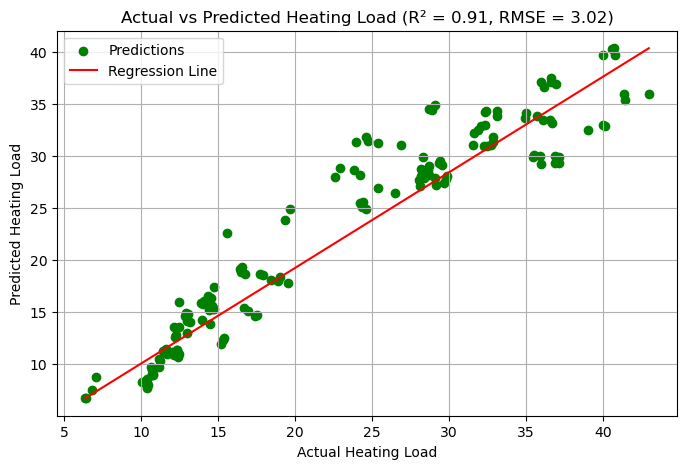


🔹 Cooling Load Evaluation Metrics:
Mean Squared Error (MSE): 9.89
R² Score: 0.89
Root Mean Squared Error (RMSE): 3.15


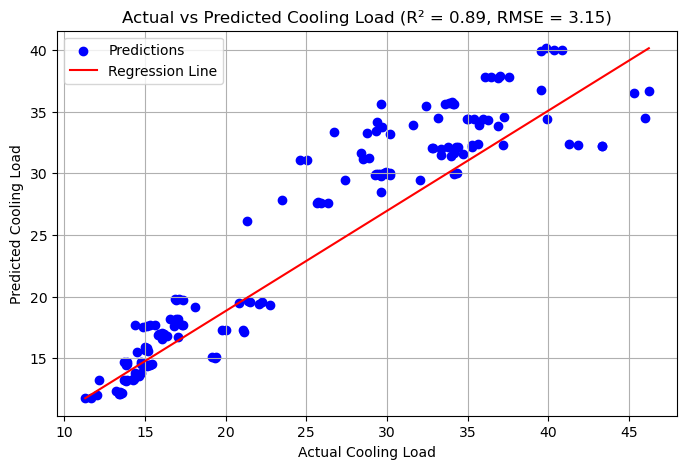

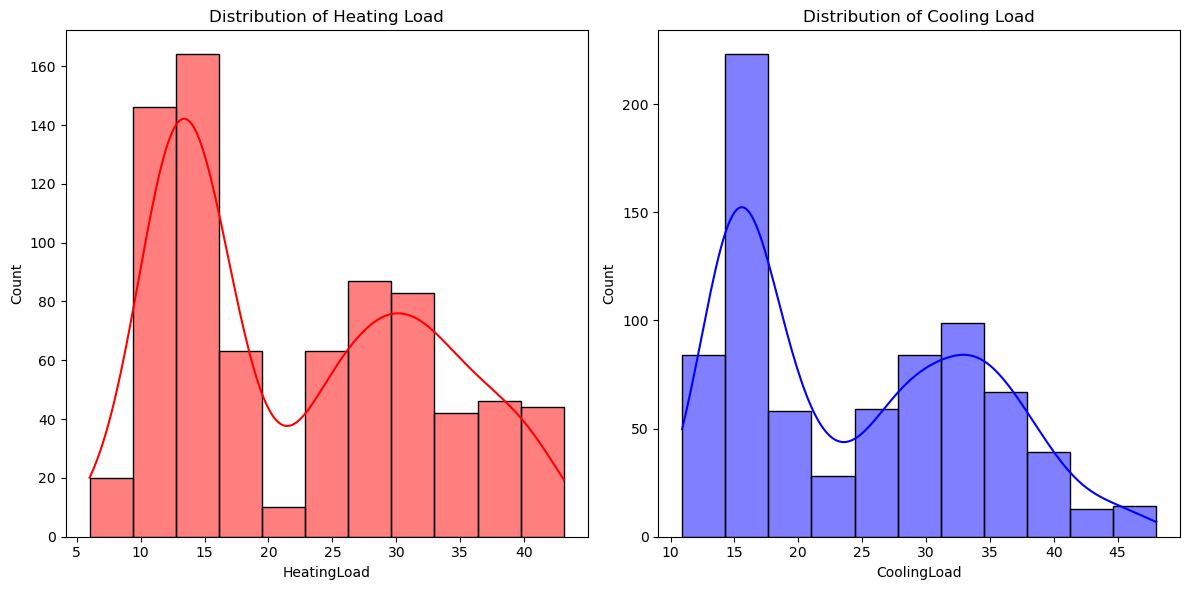

C:\Users\Ar\AppData\Local\Temp\ipykernel_10608\3059643188.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_percentages.values, y=feature_percentages.index, palette="viridis")
C:\Users\Ar\AppData\Local\Temp\ipykernel_10608\3059643188.py:131: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


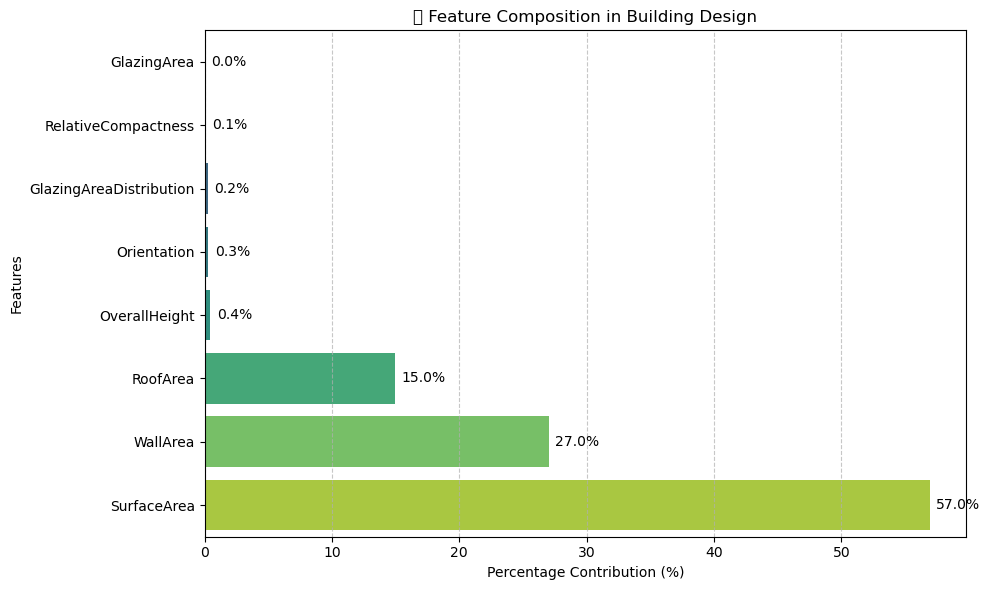

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


df = pd.read_csv("energy_efficiency_data.csv")  
df.columns = ['RelativeCompactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'OverallHeight',
              'Orientation', 'GlazingArea', 'GlazingAreaDistribution', 'HeatingLoad', 'CoolingLoad']

print("\n🔹 First Few Rows of the Dataset:\n")
print(df.head())

print("\n🔹 Dataset Info:\n")
print(df.info())

print("\n🔹 Descriptive Statistics:\n")
print(df.describe())

print("\n🔹 Missing Values:\n")
print(df.isnull().sum())

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)] 
print(f"\n🔹 Data After Removing Outliers (Shape): {df_no_outliers.shape}")


X = df_no_outliers.drop(['HeatingLoad', 'CoolingLoad'], axis=1)
y_heating = df_no_outliers['HeatingLoad']
y_cooling = df_no_outliers['CoolingLoad']

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)

# Step 9: Creating and training the Linear Regression model for Heating Load
model_heating = LinearRegression()
model_heating.fit(X_train, y_train_heating)

# Step 10: Making predictions for Heating Load
y_pred_heating = model_heating.predict(X_test)

# Step 11: Evaluating the model for Heating Load
mse_heating = mean_squared_error(y_test_heating, y_pred_heating)
r2_heating = r2_score(y_test_heating, y_pred_heating)
rmse_heating = np.sqrt(mse_heating)

print("\n🔹 Heating Load Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_heating:.2f}")
print(f"R² Score: {r2_heating:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_heating:.2f}")


plt.figure(figsize=(8,5))
plt.scatter(y_test_heating, y_pred_heating, color='green', label="Predictions")
plt.plot([min(y_test_heating), max(y_test_heating)], [min(y_pred_heating), max(y_pred_heating)], color='red', label="Regression Line")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title(f"Actual vs Predicted Heating Load (R² = {r2_heating:.2f}, RMSE = {rmse_heating:.2f})")
plt.legend()
plt.grid(True)
plt.show()


X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)
model_cooling = LinearRegression()
model_cooling.fit(X_train, y_train_cooling)
y_pred_cooling = model_cooling.predict(X_test)
mse_cooling = mean_squared_error(y_test_cooling, y_pred_cooling)
r2_cooling = r2_score(y_test_cooling, y_pred_cooling)
rmse_cooling = np.sqrt(mse_cooling)

print("\n🔹 Cooling Load Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_cooling:.2f}")
print(f"R² Score: {r2_cooling:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cooling:.2f}")


plt.figure(figsize=(8,5))
plt.scatter(y_test_cooling, y_pred_cooling, color='blue', label="Predictions")
plt.plot([min(y_test_cooling), max(y_test_cooling)], [min(y_pred_cooling), max(y_pred_cooling)], color='red', label="Regression Line")
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title(f"Actual vs Predicted Cooling Load (R² = {r2_cooling:.2f}, RMSE = {rmse_cooling:.2f})")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plotting the distribution of Heating Load and Cooling Load
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['HeatingLoad'], kde=True, color='red')
plt.title("Distribution of Heating Load")
plt.subplot(1, 2, 2)
sns.histplot(df['CoolingLoad'], kde=True, color='blue')
plt.title("Distribution of Cooling Load")
plt.tight_layout()
plt.show()

feature_means = X.mean()
total = feature_means.sum()
feature_percentages = (feature_means / total) * 100
feature_percentages = feature_percentages.sort_values(ascending=True)  # Sorted for better visuals

plt.figure(figsize=(10,6))
sns.barplot(x=feature_percentages.values, y=feature_percentages.index, palette="viridis")
plt.xlabel("Percentage Contribution (%)")
plt.ylabel("Features")
plt.title("📊 Feature Composition in Building Design")
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(feature_percentages.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')
plt.tight_layout()
plt.show()
